## 7) Model Evaluation

Evaluating the model's performance is crucial to ensure it can accurately predict outcomes on new data. The confusion matrix and accuracy score provide insights into the model's ability to distinguish between approved and not approved applications. This is critical for minimizing false approvals and rejections, directly impacting the bank's operations and customer satisfaction.

In [152]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_scaled)

accuracy = model.score(X_test_scaled, y_test)
print("Accuracy of logistic regression classifier: ", accuracy)

# PRINT THE CONFUSION MATRIX OF THE LOGREG MODEL
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

Accuracy of logistic regression classifier:  0.855072463768116
Confusion Matrix: 
[[101  17]
 [ 13  76]]


In [154]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.855072463768116
Precision: 0.8172043010752689
Recall: 0.8539325842696629


**Instructions:**
1. Calculate and plot the ROC curve for the model. The ROC curve is a graphical representation of a classifier's performance and is useful for visualizing the trade-off between the true positive rate and false positive rate at various threshold settings.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


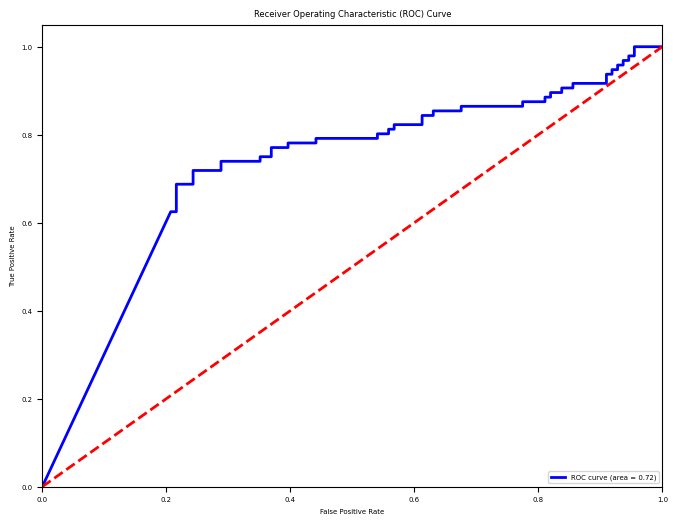

In [397]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc

# CALCULATE THE FPR AND TPR FOR ALL THRESHOLDS OF THE CLASSIFICATION
# Predict probabilities for positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# method to plot ROC Curve
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = 5
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()